## Решение для крупного интернет-магазина по увеличению выручки

Крупный интернет-магазин поставил отделу маркетинга и аналитики задачу - увеличить выручку. Совместно с отделом маркетинга были подготовлены 9 возможных способов увеличения выручки. Все они носят гипотетический характер, то есть увеличат ли они выручку неизвестно, это можно только проверить при практическом внедрении. Все 9 гипотез проверить нет возможности. Поэтому отделу аналитики надо выбрать наиболее перспективные. После проверки перспективных гипотез путем проведения A/B тестирования отделу аналитики надо проанализировать их результаты и принять решение об успешности способа увеличения выручки для рекомендаций руководитсву по его внедрению уже на весь интернет-магазин.

**Цели исследования**

- Выбрать наиболее перспективные гипотезы для увеличения выручки
- Проанализировать резутаты A\B тестирования выбранной гипотезы по метрикам. 
- Принять решение о дальнейшем внедрении способа увеличения выручки

**Ход исследования**

Данные представлены в трех датасетах. О качестве данных ничего не известно, поэтому перед основным исследованием потребуется обзор данных. Надо проверить даные на ошибки, пропуски и дубликаты. Если они есть, надо найти возможность исправить некорректные данные. 

При анализе A\B тестирования выбранной гипотезы будут рассмтроены следующие метрики: куммулятивная выручка по группам, куммулятивный средний чек по группам, куммулятивная конверсия по группам, а также относительные их измерения в тестируемой группе В относительно базовой А. Оценена статистическая значимость выявленных различий этих метрик.

Таким образом, исследоваание будет состоять из пяти этапов:

- Загрузка данных и подготовка данных к анализу
- Приоритизация гипотез
- Анализ результатов А\В тестирования
- Принятие решения об успешности гипотезы
- Общий вывод

## Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)
plt.rcParams ['figure.figsize'] = [15, 8]

In [3]:
try: 
    hypothesis = pd.read_csv('d:/practicum/9sprint/hypothesis.csv')
    orders = pd.read_csv('d:/practicum/9sprint/orders.csv')
    visits = pd.read_csv('d:/practicum/9sprint/visitors.csv')

except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visits = pd.read_csv('/datasets/visitors.csv')

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


Таблица hypothesis содержит 9 строк. Пропусков нет. Названия колонок требуется привести к нижнему регистру.

In [5]:
hypothesis.columns = hypothesis.columns.str.lower()

In [6]:
hypothesis.head(5)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Колонку date надо перевести к типу datetime

In [8]:
orders['date'] = pd.to_datetime(orders['date'])

In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Таблица orders содержит 1197 строк. Пропусков нет.

In [10]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Колонку date надо перевести к типу datetime

In [11]:
visits['date'] = pd.to_datetime(visits['date'])

In [12]:
visits.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Таблица visits содержит 62 строчки. Пропусков нет.

In [13]:
print(visits.duplicated().sum(), orders.duplicated().sum(), hypothesis.duplicated().sum())

0 0 0


Дубликатов в таблицах нет.

**Промежуточный вывод**

Первичный анализ датасетов показал, что данные в таблицах корректные, без пропусков и дубликатов. Коррекция типов данных не требутся.

## Приоритизация гипотез

Для проверки в A/B тестировании отделом марткетига предлагается 9 гипотез. Проверять их все на практике - слишком трудозатратно, поэтому нам надо выбрать самые перспективные. Для этого используем критерии приоритизации ICE и RICE. 

Критерий ICE вычисляетя по формуле ICE = impact * confidence / efforts

Критерий RICE вычисляетя по формуле RICE = Reach * impact * confidence / efforts

, где: Reach — скольких пользователей затронет изменение;
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
Confidence — уверенность, что это изменение повлияет на пользователей именно так; 
Efforts — стоимость тестирования гипотезы. 

эти параметры оценивались по 10-бальной шкале соответствующими специалистами. Оценки были сведены в одну таблицу, на основе которой предстоит выполнить выбор наиболее переспективных гипотез для последующей проверки в A/B тестировании.

In [14]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Критерий ICE

In [15]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по критерию ICE: 8, 0, 7, 6, 2

- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	


### Критерий RICE

In [16]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'] 

hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


Критерий RICE показывает, что наиболее перспективные гипотезы: 7, 2, 0, 6. 

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

**Промежуточный вывод**

Криетрии ICE и RICE отдают предпочтение одним и тем же гипотезам - 0, 2, 6, 7. 

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Однако ранжирование их изменилось, так как критерий RICE учитывает еще параметр Reach - количество пользователей, которых затронет проверяемая гипотеза. Для гипотез "Добавить блоки рекомендаций товаров" и "Показать на главной странице баннеры с актуальными акциями" эти значения самые высокие - 8 и 10, что автоматом и ставить их выше остальных. Гипотеза "Запустить акцию, дающую скидку на товар в день рождения" хотя и получила наивысший бал по критерию ICE, по критерию RICE имет весьма низкий балл, так как связана с днем рождения пользователей, что занчительно снижает охват.

## Анализ A/B-теста

Для анализа были предоставлены промежуточные результаты А/В тестирования - таблица визитов visits и таблица заказов orders посетителей. Посетители каким-то образом были разделенны на две группы - A и B. 

### Первичный анализ данных тестирования

In [17]:
print('В таблице orders данные с', orders['date'].min(), 'по', orders['date'].max())
print('В таблице visits данные с', visits['date'].min(), 'по', visits['date'].max())

В таблице orders данные с 2019-08-01 00:00:00 по 2019-08-31 00:00:00
В таблице visits данные с 2019-08-01 00:00:00 по 2019-08-31 00:00:00


Временные рамки таблиц orders и visits соответствуют друг другу.

In [18]:
print('В таблице orders уникальных покупателей', orders['visitorId'].nunique(), 
    'и уникальных заказов', orders['transactionId'].nunique())

В таблице orders уникальных покупателей 1031 и уникальных заказов 1197


In [19]:
print('Общая сумма стоимости заказов', orders['revenue'].sum(), 
      '\n из них группа А', orders[orders['group'] =='A']['revenue'].sum(),
      '\n группа В', orders[orders['group'] =='B']['revenue'].sum(),
      '\n отношение сумм заказовов в группах {0:.2%} '. 
      format(orders[orders['group'] =='A']['revenue'].sum() / orders[orders['group'] =='B']['revenue'].sum() - 1)    
     )

Общая сумма стоимости заказов 9992563 
 из них группа А 4084803 
 группа В 5907760 
 отношение сумм заказовов в группах -30.86% 


In [20]:
print('По таблице visits всего визитов', visits['visitors'].sum(), 
      '\n из них группа А', visits[visits['group'] =='A']['visitors'].sum(),
      '\n группа В', visits[visits['group'] =='B']['visitors'].sum(),
      '\n отношение количества посетителей групп {0:.2%} '. 
            format(visits[visits['group'] =='A']['visitors'].sum() / visits[visits['group'] =='B']['visitors'].sum() - 1)   
     ) 


По таблице visits всего визитов 37652 
 из них группа А 18736 
 группа В 18916 
 отношение количества посетителей групп -0.95% 


Количество посететелй в группах - сопоставимое, разница в пользу группы В 2%. При этом на группу В пришлось значительно большая сумма стоимости заказов. Здесь разница более существенная - уже 30%. Уже на этом этапе можно предположить, что в группе В были более дорогие заказы. Были ли это единичные случаи или гипотеза дала общее увеличение - будет ясно из следующих исследований.

In [21]:
print('Всего заказов', orders['transactionId'].nunique(), 
      '\n Общая сумма заказов', orders['revenue'].sum(),
      '\n Средний чек {0:.2f}'.format(orders['revenue'].sum() / orders['transactionId'].nunique()))

print()
print('Заказов в группе А', orders[orders['group'] =='A']['transactionId'].nunique(), 
      '\n Сумма заказов группы А', orders[orders['group'] =='A']['revenue'].sum(),
      '\n Средний чек группы А {0:.2f}'.format(orders[orders['group'] =='A']['revenue'].sum() / 
                                               orders[orders['group'] =='A']['transactionId'].nunique()))

print()
print('Заказов группы В', orders[orders['group'] =='B']['transactionId'].nunique(), 
      '\n Сумма заказов группы В', orders[orders['group'] =='B']['revenue'].sum(),
      '\n Средний чек группы В {0:.2f}'.format(orders[orders['group'] =='B']['revenue'].sum() / 
                                               orders[orders['group'] =='B']['transactionId'].nunique()))


Всего заказов 1197 
 Общая сумма заказов 9992563 
 Средний чек 8348.01

Заказов в группе А 557 
 Сумма заказов группы А 4084803 
 Средний чек группы А 7333.58

Заказов группы В 640 
 Сумма заказов группы В 5907760 
 Средний чек группы В 9230.88


Средний чек в базовой группе А - 7300, средний чек в тестируемой группе В значительно выше - 9200. Пкоа нельзя сказать, что это результат тестируемого способа увеличения выручки или единичные более дорогие заказы, которые случайно пришлись на группу В.

In [22]:
print('Всего визитов', visits['visitors'].sum(), 
      '\n всего заказов', orders['transactionId'].nunique(),
      '\n общая конверсия {0:.2%}'.format(orders['transactionId'].nunique() / visits['visitors'].sum()))
print()
print('Визитов в группе А', visits[visits['group'] =='A']['visitors'].sum(), 
      '\n заказов в группе A', orders[orders['group'] =='A']['transactionId'].nunique(),
      '\n конверсия группы А {0:.2%}'.format(orders[orders['group'] =='A']['transactionId'].nunique() / 
                                      visits[visits['group'] =='A']['visitors'].sum()))
print()
print('Визитов в группе B', visits[visits['group'] =='B']['visitors'].sum(), 
      '\n заказов в группе B', orders[orders['group'] =='B']['transactionId'].nunique(),
      '\n конверсия группы В {0:.2%}'.format(orders[orders['group'] =='B']['transactionId'].nunique() / 
                                      visits[visits['group'] =='B']['visitors'].sum()))


Всего визитов 37652 
 всего заказов 1197 
 общая конверсия 3.18%

Визитов в группе А 18736 
 заказов в группе A 557 
 конверсия группы А 2.97%

Визитов в группе B 18916 
 заказов в группе B 640 
 конверсия группы В 3.38%


Конверсия в базовой группе А - 3%.

Калькулятор расчёта размера выборки (https://www.evanmiller.org/ab-testing/sample-size.html), при заданом минимальном эффекте 
прироста в 10%, дает выборку в 52 тысячи пользователей в каждой из групп.

Калькулятор длительности теста (https://vwo.com/tools/ab-test-duration-calculator/) при средней посещяемости в 1200 посетителей в сутки дает длительность теста порядка трех месяцев.

**Промежуточный вывод**

Для анализа представлены датасеты после месяца тестирования гипотезы. По этим данным уже видно превышение метрик группы В над базовой группой А. Однако размер выборки и длительность теста меньше расчетных. Наблюдаемый эффект может быть обусловлен выбросами. Далее оценим, можно ли принимать решение о досрочном прекрашении тестирования.

### Подготовка данных для построяния кумулятивных графиков

Сгруппируем данные по дням и группам, вычислив по таблице заказов для каждого дня и группы кумулятивные (т.е. нарастанием) количество покупателей, количество заказов, и общую стоимость заказов, а по таблице визитов количество визитов.

In [23]:
datesGroups = orders[['date','group']].drop_duplicates() 

ordersAggregated = datesGroups\
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)\
    .sort_values(by=['date','group']) 

visitorsAggregated = datesGroups\
    .apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
    .sort_values(by=['date','group'])

Объединяем таблицы, переназывааем колонки

In [24]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Создаем отдельные таблицы для групп A и B

In [25]:
A_cumulat_revenue = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
B_cumulat_revenue = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

### График кумулятивной выручки по группам

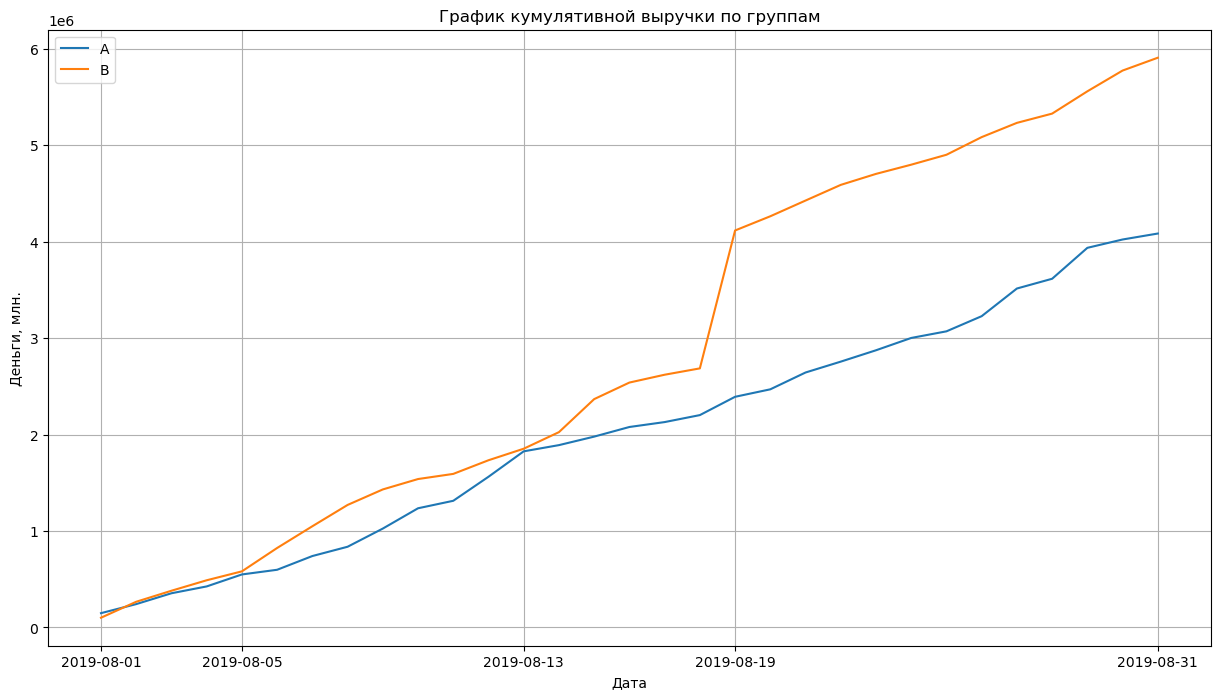

In [26]:
plt.plot(A_cumulat_revenue['date'], A_cumulat_revenue['revenue'], label='A')
plt.plot(B_cumulat_revenue['date'], B_cumulat_revenue['revenue'], label='B')


plt.xticks(['2019-08-01', '2019-08-05', '2019-08-13', '2019-08-19', '2019-08-31'])
plt.xlabel('Дата')
plt.ylabel('Деньги, млн.')
plt.title('График кумулятивной выручки по группам')
plt.legend()
plt.grid()
plt.show()

Оба графика растут почти параллельно во время тестирования. Группа B на протяжении половины теста показывала чуть более высокий результ. 19 августа в группе B произошел резкий скачок кумулятивной выручки. Дальше линии пошли практически параллельно. Это похоже на влияние аномально больших заказов в этот день. Истинную причину этого скачка выясним в дальшейших исследованиях.

### График кумулятивного среднего чека по группам

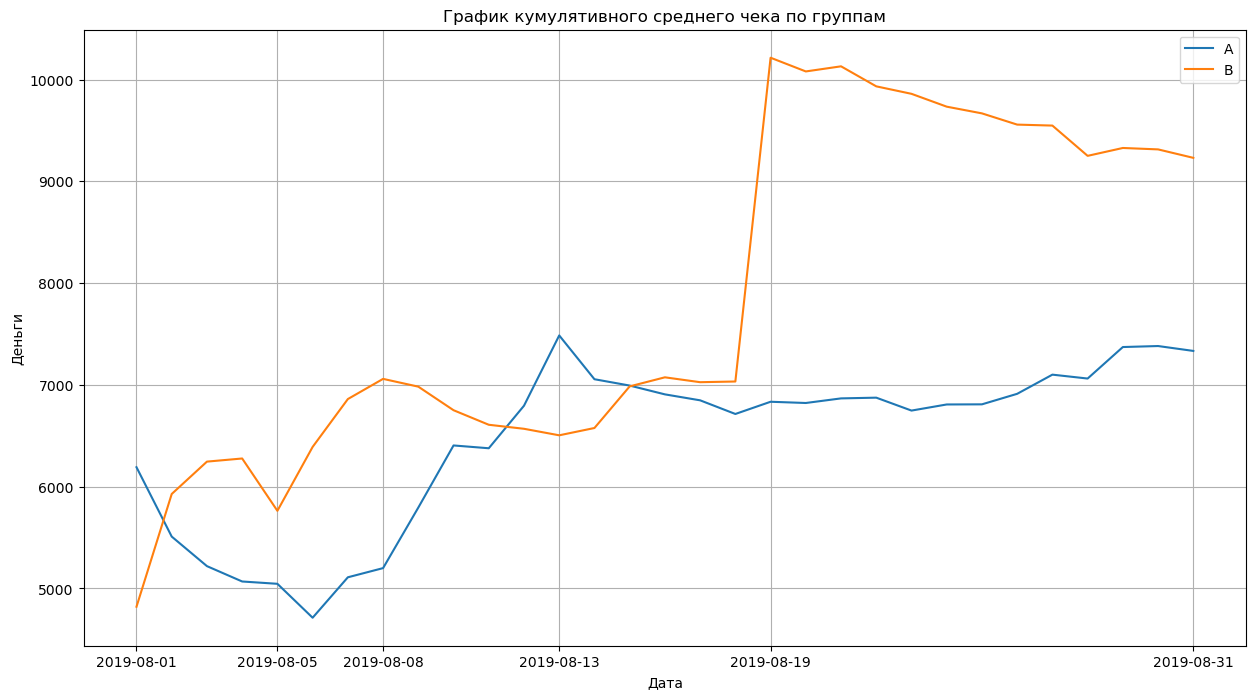

In [27]:
plt.plot(A_cumulat_revenue['date'], A_cumulat_revenue['revenue'] / A_cumulat_revenue['orders'], label='A')
plt.plot(B_cumulat_revenue['date'], B_cumulat_revenue['revenue'] / B_cumulat_revenue['orders'], label='B')

plt.xticks(['2019-08-01', '2019-08-05', '2019-08-08', '2019-08-13', '2019-08-19', '2019-08-31'])
plt.xlabel('Дата')
plt.ylabel('Деньги')
plt.title('График кумулятивного среднего чека по группам')
plt.legend()
plt.grid()
plt.show()

На графике кумулятивного среднего чека видны колебания графиков. Для группы В переломы трендов были в даты 5, 8, 13 и 19 августа, а для группы А в даты 6, 13 августа. Наибольший скачок также зафиксирован 19 августа в группе B. После чего линия группы B пошла на спад. Это также похоже на влияние аномально больших заказов.

### График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график соотношение кумулятивных средних чеков (кум.ср.чек B - кум.ср.чек A) / кум.ср.чек A

Для этого объядиним таблицы кумулятивных выручек групп B и A. Для графика вычислим соотношение (выручка В / заказы В) / (выручка А / заказы А) - 1 

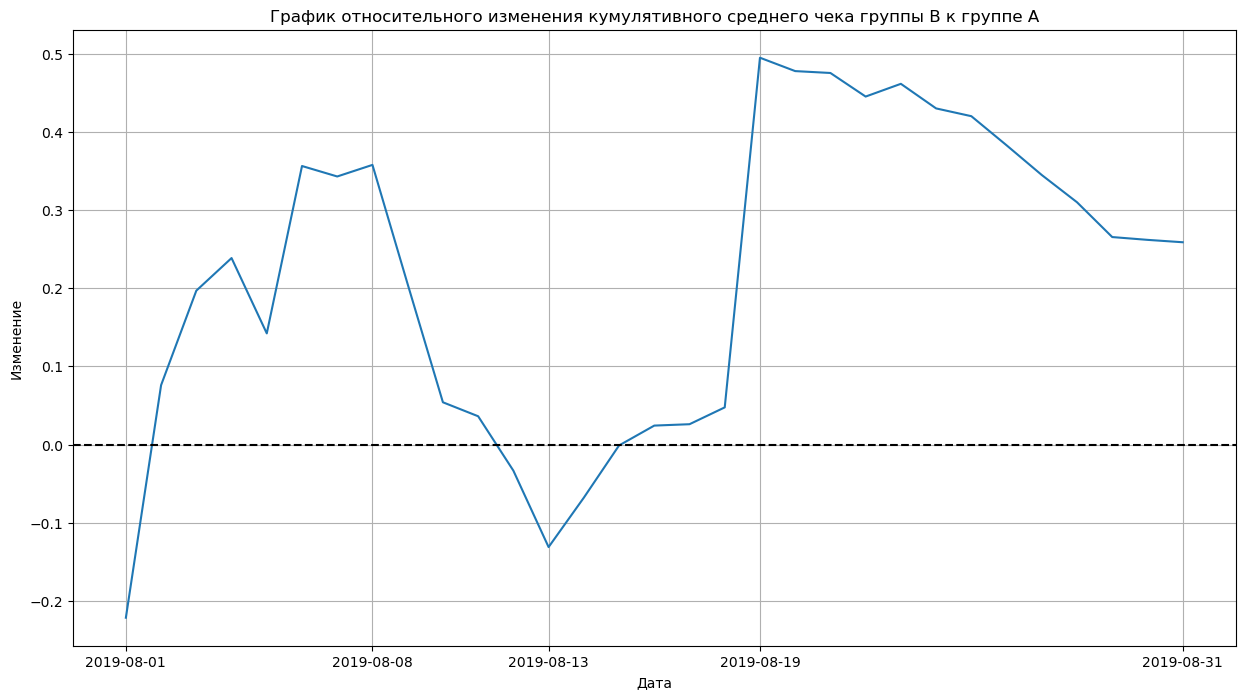

In [28]:
all_cumulat_revenue = A_cumulat_revenue.merge(B_cumulat_revenue, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(all_cumulat_revenue['date'],
         (all_cumulat_revenue['revenueB'] / all_cumulat_revenue['ordersB']) / 
         (all_cumulat_revenue['revenueA'] / all_cumulat_revenue['ordersA']) - 1)

plt.axhline(y=0, color='black', linestyle='--') 

plt.xticks(['2019-08-01', '2019-08-08', '2019-08-13', '2019-08-19', '2019-08-31'])
plt.xlabel('Дата')
plt.ylabel('Изменение')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.grid()

plt.show()


График относительного изменения кумулятивного среднего чека группы B к группе A также колеблется на протяжении большего времени проведения теста. Тренд изменения кумулятивного среднего чека группы В к группре А несколько раз менялся за время теста. Переломные даты - 8, 13 и 19 августа. Причем в последнюю дату было самое большое измнение. Возможно, на эти дни пришлись заказы с аномально большими суммами.

### График кумулятивного среднего количества заказов на посетителя по группам

Вычислим конверсию - отношение заказов к посетителеям. Разведем данные по группам A и B в разные таблицы.

In [29]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
A_cumulat_conv = cumulativeData[cumulativeData['group']=='A']
B_cumulat_conv = cumulativeData[cumulativeData['group']=='B']

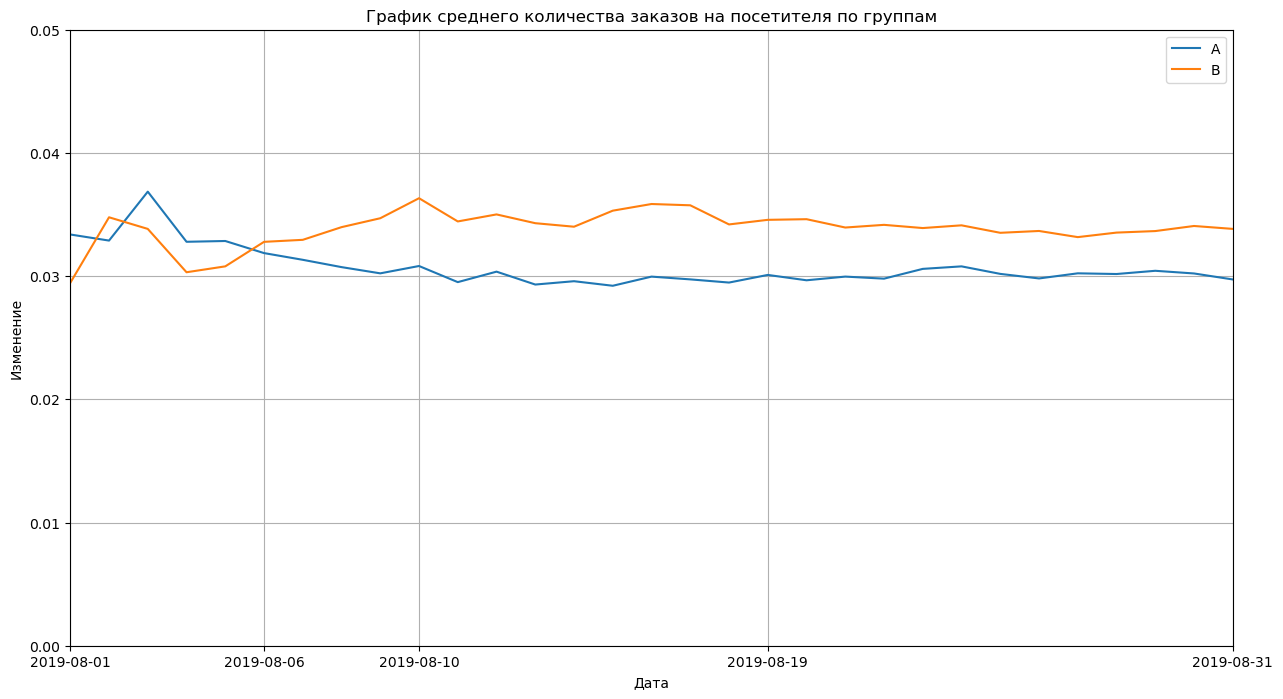

In [30]:
plt.plot(A_cumulat_conv['date'], A_cumulat_conv['conversion'], label='A')
plt.plot(B_cumulat_conv['date'], B_cumulat_conv['conversion'], label='B')
plt.xticks(['2019-08-01', '2019-08-06', '2019-08-10', '2019-08-19', '2019-08-31'])
plt.xlabel('Дата')
plt.ylabel('Изменение')
plt.title('График среднего количества заказов на посетителя по группам')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0, 0.05])
plt.legend()
plt.grid()
plt.show()

Певыре дни тестированитя группа A имела большее кумулятивное среднее количество заказов. Однако уже 6 августа в группе B конверсия стала выше группы А. Далее графики зафиксировались около своих значений, причем группе В выше группы А.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

In [31]:
all_cumulat_conv = A_cumulat_conv[['date','conversion']].merge(B_cumulat_conv[['date','conversion']],\
                left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

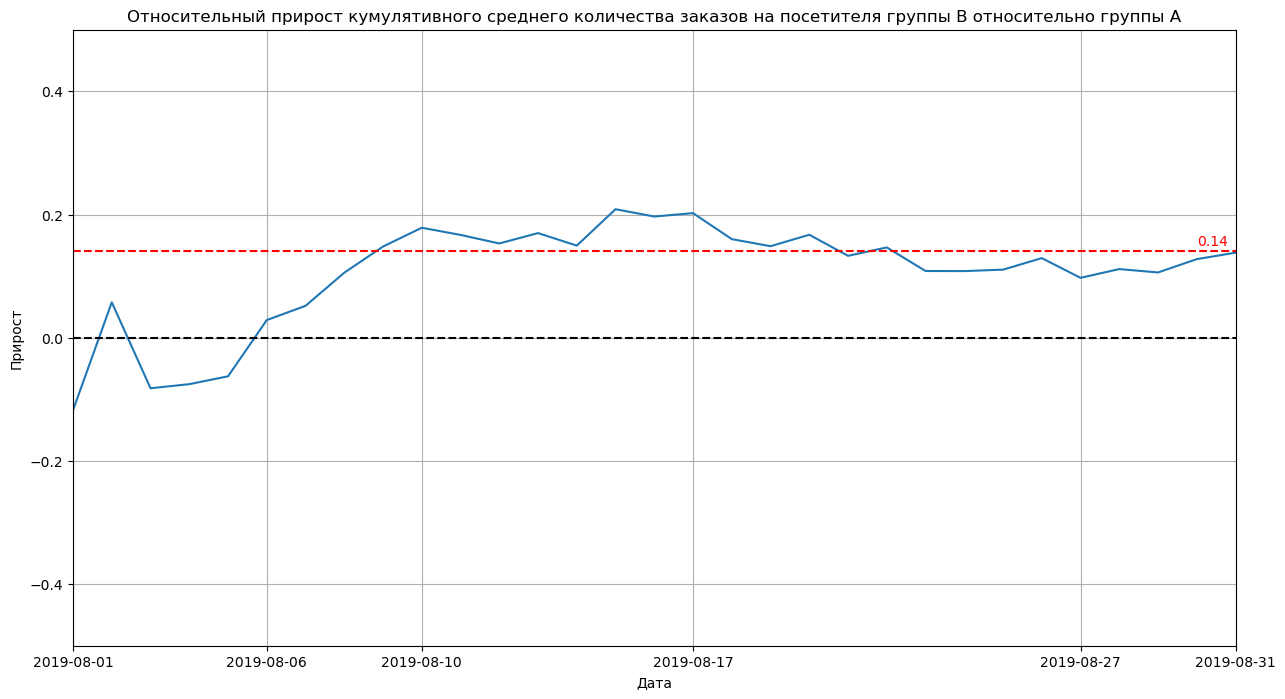

In [32]:
plt.plot(all_cumulat_conv['date'], all_cumulat_conv['conversionB'] / all_cumulat_conv['conversionA'] - 1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='red', linestyle='--')
plt.text(pd.to_datetime('2019-08-30'), 0.15,'0.14', color='red')
plt.xticks([ '2019-08-01', '2019-08-06', '2019-08-10', '2019-08-17', '2019-08-27', '2019-08-31'])
plt.xlabel('Дата')
plt.ylabel('Прирост')
plt.title('Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), -0.5, 0.5])
plt.grid()
plt.show()


Как видно из графика, на 6 день тестирования конверсия в группе B стала больше, чем в группе A. К 10 августа достигла максимума прироста в 20%. Однако с 17 августа наблюдался спад прироста до уровня примерно в 14%. На этой отметке метрика и стабилизировалась до конца тестирования. 

### Точечный график количества заказов по пользователям

Проанализуруем аномальные значения в данных, которые могли давать скачки в рассмотренных выше метриках

Построим точеный график количества заказов, приходящихся на каждого пользователя

In [33]:
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))
x_values = pd.Series(range(0, len(ordersByUsers)))

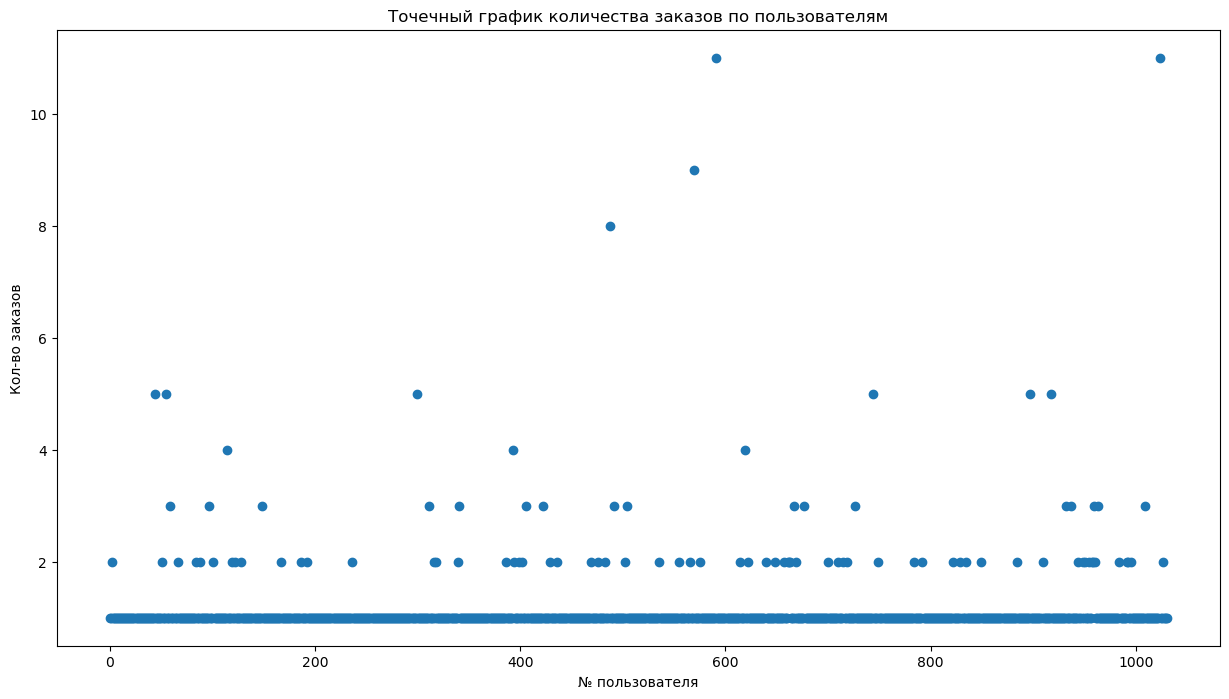

In [34]:
plt.figure(figsize=(15, 8))
plt.scatter(x_values, ordersByUsers['transactionId']) 
plt.xlabel('№ пользователя')
plt.ylabel('Кол-во заказов')
plt.title('Точечный график количества заказов по пользователям')

plt.show()

Из графика видно, что большинство пользователей делали только один заказ, значимое число пользователей сделали по 2 заказа. Пользователей, сделавших по 4 и более заказов, уже совсем мало. Они вполне могут быть признаны аномальными и отброшены.

Расчитаем также 95-й и 99-й перцентили количества заказов на пользователя

In [35]:
print(np.percentile(ordersByUsers['transactionId'], [95, 99]))

[2. 4.]


Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей — больше 4 заказов. Что подтверждает оценку границы для определения аномальных пользователей в 4 и более заказов.

### Точечный график суммы заказов

Построим точеный график суммы стоимости заказов

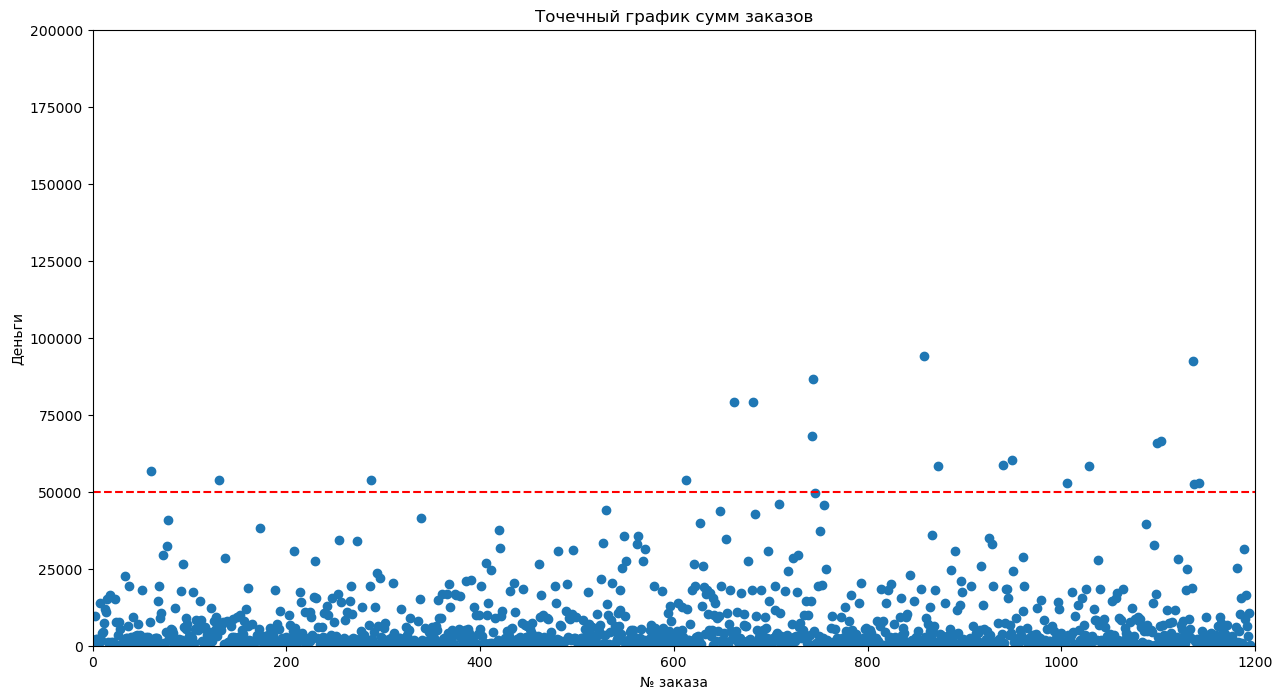

In [36]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 
plt.xlabel('№ заказа')
plt.ylabel('Деньги')
plt.title('Точечный график сумм заказов')
plt.axis([0, 1200, 0, 200000])
plt.axhline(y=50000, color='red', linestyle='--')
plt.show()


Подавлящее большинсвто покупателей, сделали заказы на сумму до 50 тысяч. Все что выше - могут быть признаны аномальными. Однако по графику определить границу можно только "на глаз". В данном случае это не самое лучшее решение.

Расчитаем 95-й и 99-й перцентили сумм заказов

In [37]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более 5% пользователей совершали заказы на сумму большее 28000. Менее 1% пользователя заказали на сумму 58000. Примем границу для определения аномальных пользователей 30000.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Как было показано выше, в данных есть большие выбросы, значит алгебраические критерии проверки могут работают плохо, так как учитывают все значения. Проверим стастическую значимость различий в среднем количестве заказов на посетителя между группами по непараметрическому критерию Манна-Уитни. Для этого надо сформировать таблицы заказов по посетителям, включая "ноль" для тех, кто ничего не заказывал. Пока используем «сырых данные» данные, т.е. включая аномальные. 

In [38]:
A_buyers_orders = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False)['transactionId'].nunique()
B_buyers_orders = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False)['transactionId'].nunique()


A_allusers_orders = pd.concat([A_buyers_orders['transactionId'], pd.Series(0, 
    index=np.arange(visits[visits['group']=='A']['visitors'].sum() - len(A_buyers_orders['transactionId'])))],axis=0)

B_allusers_orders = pd.concat([B_buyers_orders['transactionId'], pd.Series(0,
    index=np.arange(visits[visits['group']=='B']['visitors'].sum() - len(B_buyers_orders['transactionId'])))],axis=0)

Сформулируем гипотезы для проверки по критерию Манна-Уитни: 
- Нулевая - различий в среднем количестве заказов между группами нет
- Альтернативная - различия в среднем между группами есть.


Примем критический уровень статистической значимости альфа в 5%

In [39]:
print('P-value критерия Манна-Уитни равен {0:.3f}'.format(stats.mannwhitneyu(A_allusers_orders, B_allusers_orders)[1]))

print('Относительный прирост средней конверсии группы B к средней конверсии группы A равен {0:.2%}'.format(
    B_allusers_orders.mean() / A_allusers_orders.mean() - 1))

P-value критерия Манна-Уитни равен 0.017
Относительный прирост средней конверсии группы B к средней конверсии группы A равен 13.81%


P-value меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» показывает, что в среднем количестве заказов между группами есть статистически значимые различия.

Относительный прирост среднего группы B к конверсии группы A равен почти 14%. Такой же прирост был виден при оценке кумулятивной конверссии. 


### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Проверим стастическую значимость различий в среднем количестве чеке между группами также по критерию Манна-Уитни. Используем «сырые данных» данные, т.е. включая аномальные. 

Гипотезы: 
- Нулевая - различий в среднем чеке заказа между группами нет. 
- Альтернативная - различия в среднем чеке между группами есть.

Применим критический уровень статистической значимости альфа в 5%

In [40]:
print('P-value критерия Манна-Уитни равен {0:.3f}'.format(stats.mannwhitneyu(
        orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))


print('Относительный прирост среднего чека группы B к чеку группы A равен {0:.2%}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value критерия Манна-Уитни равен 0.729
Относительный прирост среднего чека группы B к чеку группы A равен 25.87%


P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. При этом относительное различие среднего чека между группами составило уже почти 26%. Скорее всего, повлияли заказы с аномально высокими суммами. Требуется провести анализ без аномалий.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Для очищения данных отсетем пользователей с большим количеством заказов, а также тех, что сделал заказ на очень большу сумму. Возмем значения чуть больше 95 претентиля. То есть аномильными будут пользователи, сделавшие 4 и более заказов, либо с суммой одного заказа более 30000

In [41]:
usersWithManyOrders = pd.concat([
        A_buyers_orders[A_buyers_orders['transactionId'] >= 4]['visitorId'],
        B_buyers_orders[B_buyers_orders['transactionId'] >= 4]['visitorId'],
    ], axis=0)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']

abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())
len(abnormalUsers)

57

Выявлено всего 57 аномальных пользователей из 1031, или 5%.

In [42]:
A_users_filtered = pd.concat([
    A_buyers_orders[np.logical_not(A_buyers_orders['visitorId'].isin(abnormalUsers))]['transactionId'], 
    pd.Series(0, index=np.arange(visits[visits['group']=='A']['visitors'].sum() - len(A_buyers_orders['transactionId'])))
    ], axis=0)

B_users_filtered = pd.concat([
    B_buyers_orders[np.logical_not(B_buyers_orders['visitorId'].isin(abnormalUsers))]['transactionId'], 
    pd.Series(0, index=np.arange(visits[visits['group']=='B']['visitors'].sum() - len(B_buyers_orders['transactionId'])))
    ], axis=0)

Гипотезы для "очищенных" данных те же: Нулевая - различий в среднем количестве заказов между группами нет. Альтернативная - различия в среднем между группами есть. Критический уровень статистической значимости альфа - 5%

In [43]:
print('P-value критерия Манна-Уитни равен {0:.3f}'.format(stats.mannwhitneyu(A_users_filtered, B_users_filtered)[1]))

print('Относительный прирост средней конверсии группы B к средней конверсии группы A равен {0:.2%}'.format(
        B_users_filtered.mean() / A_users_filtered.mean() - 1)) 

P-value критерия Манна-Уитни равен 0.018
Относительный прирост средней конверсии группы B к средней конверсии группы A равен 14.75%


Для очищенных данных P-value также меньше 0.05, потому нулевую гипотезу отвергаем - в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост средней конверсии группы B к конверсии группы A по очищенным данным составляет почти 15%.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Гипотезы: Нулевая - различий в среднем чеке заказа между группами нет. Альтернативная - различия в среднем чеке между группами есть. Критический уровень статистической значимости альфа - 5%

In [44]:
A_clear_orders_revenue = orders.query('group == "A" and visitorId not in @abnormalUsers')['revenue']
B_clear_orders_revenue = orders.query('group == "B" and visitorId not in @abnormalUsers')['revenue']

print('P-value критерия Манна-Уитни равен {0:.3f}'.format(
    stats.mannwhitneyu(A_clear_orders_revenue, B_clear_orders_revenue)[1]))

print('Относительный прирост среднего чека группы B к чеку группы A равен {0:.2%}'.format(
    B_clear_orders_revenue.mean() / A_clear_orders_revenue.mean() - 1)) 

P-value критерия Манна-Уитни равен 0.958
Относительный прирост среднего чека группы B к чеку группы A равен -1.97%


P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. При этом "очищенные" от выбросов данные дают различие среднего чека между группами теперь всего 2%.

## Решение по результатам А\В теста 

**Остановить тест, зафиксировать победу группы B**

Хотя длительность тестирования и размер выборки пока еще меньше расчетных, группа B показывает установишийся прирост конверсии посетелей порядка 14% уже после первой недели тестирования. Увеличение конверсии в группе В относительно группа А имет статистическую значимость.

При этом другие параметры - общая посещаемость, средний чек заказов в группах, после очистики данных от аномалий, практически одинаковые в группах. Т.е. нововведение, реализованное в ходе тестирования, охватывает таких же по качеству и количеству посетителей, что и базовая группа, только привлечение идет значительно лучше. Вероятно, тестировалась гипотеза №6 - "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию".

## Общий вывод

В ходе проведенной приоритизации гипотез по критериям ICE и RICE были выбраны наиболее перспективные сопсобы увеличения выручки: 
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	

По итогам проведенного анализа результатов А/В тестирования одной из гипотез ("Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию") принято решение об остановке теста и признании эффективным тестируемого способа увеличения выручки. Рост выручки стал возможен за счет увеличения конверсии. Конверсия выросла на 14-15% уже через неделю после начала тестирования.

Рекомендуется применить тестируемый способ увеличения выручки для всех посетителей сайта.